# _automaton_.minimize(algo = "auto")

Minimize an automaton.

The algorithm can be: 
- `"auto"`: same as `"signature"` for Boolean automata on free labelsets, otherwise `"weighted"`.
- `"brzozowski"`: run determinization and codeterminization.
- `"hopcroft"`: requires free labelset and Boolean automaton.
- `"moore"`: requires a deterministic automaton.
- `"signature"`
- `"weighted"`: same as `"signature"` but accept non Boolean weightsets.

Preconditions:
- the automaton is trim
- `"brzozowski"`
  - the labelset is free
  - the weightset is $\mathbb{B}$
- `"hopcroft"`
  - the labelset is free
  - the weightset is $\mathbb{B}$
- `"moore"`
  - the automaton is deterministic
  - the weightset is $\mathbb{B}$
- `"signature"`
  - the weightset is $\mathbb{B}$

Postconditions:
- the result is equivalent to the input automaton

Caveat:
- the resulting automaton might not be minimal if the input automaton is not deterministic.

See also:
- [automaton.is_deterministic](automaton.is_deterministic.ipynb)
- [automaton.cominimize](automaton.cominimize.ipynb)
- [automaton.reduce](automaton.reduce.ipynb)

### Examples

In [1]:
import vcsn

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<IPython.core.display.Javascript object>

### Weighted

Using `minimize` or `minimize("weighted")`.

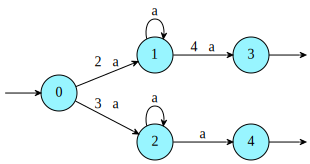

In [2]:
%%automaton a1
context = "lal_char(abc), z"
$ -> 0
0 -> 1 <2>a
0 -> 2 <3>a
1 -> 1 a
1 -> 3 <4>a
2 -> 2 a
2 -> 4 a
3 -> $
4 -> $

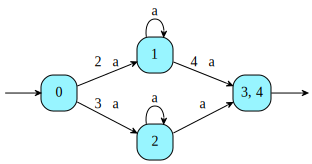

In [3]:
a1.minimize()

The following example is taken from [lombardy.2005.tcs](References.ipynb#lombardy.2005.tcs), Fig. 4.

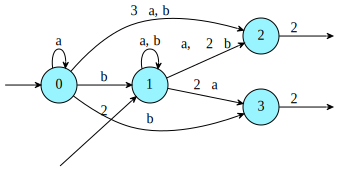

In [4]:
%%automaton a
context = "lal_char, z"
$ -> 0
$ -> 1 <2>
0 -> 0 a
0 -> 1 b
0 -> 2 <3>a,b
0 -> 3 b
1 -> 1 a, b
1 -> 2 a, <2>b
1 -> 3 <2>a
2 -> $ <2>
3 -> $ <2>

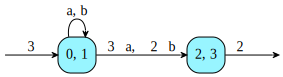

In [5]:
a.minimize()

### Signature

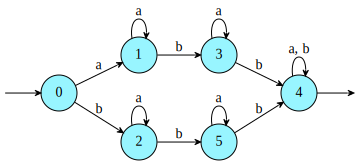

In [6]:
%%automaton a2
context = "lal_char(abcde), b"
$ -> 0
0 -> 1 a
0 -> 3 b
1 -> 1 a
1 -> 2 b
2 -> 2 a
2 -> 5 b
3 -> 3 a
3 -> 4 b
4 -> 4 a
4 -> 5 b
5 -> 5 a, b
5 -> $

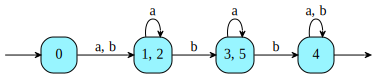

In [7]:
a2.minimize("signature")

### Moore

In [8]:
a2.is_deterministic()

True

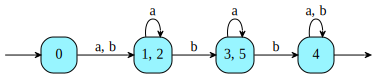

In [9]:
a2.minimize("moore")

### Brzozowski

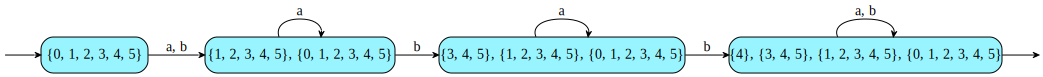

In [10]:
a2.minimize("brzozowski")

### Hopcroft

In [ ]:
a2.minimize("hopcroft")

### Minimization of transposed automaton
For minimization and cominimization to produce automata of the same implementation types, the minimization of a transposed automaton produces a transposed partition automaton, instead of the converse.

In [11]:
a = vcsn.b.expression('ab+ab').standard()
a.transpose().type()

'transpose_automaton<mutable_automaton<letterset<char_letters(ab)>, b>>'

In [12]:
a.transpose().minimize().type()

'transpose_automaton<partition_automaton<mutable_automaton<letterset<char_letters(ab)>, b>>>'

In [13]:
a.minimize().transpose().type()

'transpose_automaton<partition_automaton<mutable_automaton<letterset<char_letters(ab)>, b>>>'

### Repeated Minimization/Cominimization
The minimizations algorithms other than Brzozowski build decorated automata (whose type is `partition_automaton`).  Repeated minimizarion and/or cominization does not stack these decorations, they are collapsed into a single layer.

For instance:

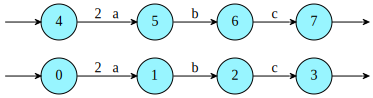

In [14]:
z = vcsn.context('lal_char, z')
a1 = z.expression('<2>abc').standard()
a2 = z.expression('ab<2>c').standard()
a = a1 | a2
a

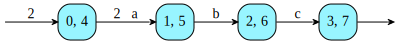

In [15]:
a.minimize()

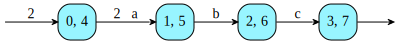

In [16]:
m = a.minimize().cominimize()
m

Note that the initial and final states are labeled `0,4` and `3,7` , not `{0}, {4}` and `{3,7}` as would have been the case if the two levels of decorations had been kept.  Indeed, the type of `m` is simple:

In [17]:
m.type()

'partition_automaton<mutable_automaton<letterset<char_letters(abc)>, z>>'

We obtain the exact same result (including decorations) even with repeated invocations, even in a different order:

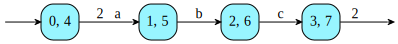

In [18]:
m2 = a.cominimize().cominimize().minimize().minimize()
m2

In [19]:
m == m2

False